In [29]:
# Importar Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [30]:
# Cargar Datos
data = pd.read_csv('ventas.csv', delimiter=';')

In [31]:
# Limpieza y Transformación de Datos
data['Fecha'] = pd.to_datetime(data['Fecha'])  # Convertir fecha a formato datetime
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['Día'] = data['Fecha'].dt.day
data['Día_semana'] = data['Fecha'].dt.weekday  # Día de la semana (0=Lunes, 6=Domingo)

In [32]:
# Seleccionar Variables Predictoras y Dependientes
features = ['Año', 'Mes', 'Día', 'Día_semana']  # Variables predictoras
X = data[features]  # Matriz de características
y_quantity = data['Cantidad Vendida']  # Variable dependiente 1
y_revenue = data['Ingresos']  # Variable dependiente 2

In [33]:
# Dividir Conjunto de Datos en Entrenamiento y Prueba
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y_quantity, test_size=0.2, random_state=42)
_, _, y_train_r, y_test_r = train_test_split(X, y_revenue, test_size=0.2, random_state=42)

In [34]:
# Modelo de Regresión para Cantidad Vendida
model_quantity = RandomForestRegressor(random_state=42, n_estimators=100)
model_quantity.fit(X_train, y_train_q)
y_pred_q = model_quantity.predict(X_test)

In [35]:
# Modelo de Regresión para Ingresos
model_revenue = RandomForestRegressor(random_state=42, n_estimators=100)
model_revenue.fit(X_train, y_train_r)
y_pred_r = model_revenue.predict(X_test)

In [36]:
# Evaluar Modelos
print("Modelo: Cantidad Vendida")
print(f"R²: {r2_score(y_test_q, y_pred_q)}")
print(f"MAE: {mean_absolute_error(y_test_q, y_pred_q)}")
print(f"MSE: {mean_squared_error(y_test_q, y_pred_q)}\n")

print("Modelo: Ingresos")
print(f"R²: {r2_score(y_test_r, y_pred_r)}")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_r)}")
print(f"MSE: {mean_squared_error(y_test_r, y_pred_r)}")

Modelo: Cantidad Vendida
R²: -0.3996448525406586
MAE: 5.819000000000001
MSE: 44.967090000000006

Modelo: Ingresos
R²: -0.6202075256672714
MAE: 391.32424663233985
MSE: 201836.96109475524


In [38]:
# Visualización de Resultados
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

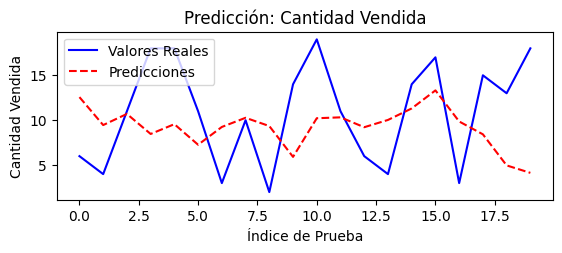

In [39]:
# Ventas Históricas y Predicción de Cantidad Vendida
plt.subplot(2, 1, 1)
plt.plot(y_test_q.values, label='Valores Reales', color='blue')
plt.plot(y_pred_q, label='Predicciones', color='red', linestyle='dashed')
plt.title('Predicción: Cantidad Vendida')
plt.xlabel('Índice de Prueba')
plt.ylabel('Cantidad Vendida')
plt.legend()

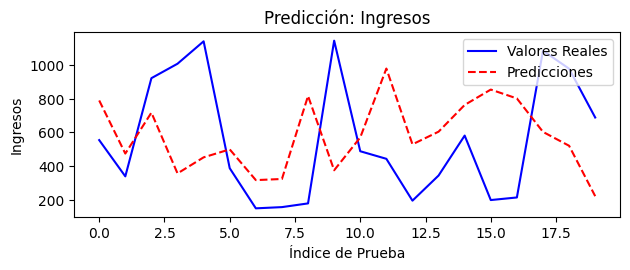

In [40]:
# Ingresos Históricos y Predicción de Ingresos
plt.subplot(2, 1, 2)
plt.plot(y_test_r.values, label='Valores Reales', color='blue')
plt.plot(y_pred_r, label='Predicciones', color='red', linestyle='dashed')
plt.title('Predicción: Ingresos')
plt.xlabel('Índice de Prueba')
plt.ylabel('Ingresos')
plt.legend()

plt.tight_layout()
plt.show()